In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import scipy.stats as stats
import pandas as pd


In [40]:
df = pd.read_csv('data/steam.csv')
df = df.loc[df['negative_ratings']<100000].loc[df['median_playtime']<40000]
df.head()

df.describe()

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
count,2.706200e+04,27062.000000,27062.000000,27062.000000,27062.000000,27062.000000,27062.000000,27062.000000,27062.000000
mean,5.963253e+05,0.981154,0.354408,45.255118,840.544047,167.765391,121.626857,110.222859,6.074726
std,2.508443e+05,0.135982,2.404219,352.753408,7872.362995,1474.667544,829.701525,781.979134,7.865658
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.014425e+05,1.000000,0.000000,0.000000,6.000000,2.000000,0.000000,0.000000,1.690000
50%,5.991700e+05,1.000000,0.000000,7.000000,24.000000,9.000000,0.000000,0.000000,3.990000
75%,7.988250e+05,1.000000,0.000000,23.000000,125.000000,41.000000,0.000000,0.000000,7.190000
max,1.069460e+06,1.000000,18.000000,9821.000000,515879.000000,91664.000000,38805.000000,38805.000000,421.990000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27062 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27062 non-null  int64  
 1   name              27062 non-null  object 
 2   release_date      27062 non-null  object 
 3   english           27062 non-null  int64  
 4   developer         27062 non-null  object 
 5   publisher         27062 non-null  object 
 6   platforms         27062 non-null  object 
 7   required_age      27062 non-null  int64  
 8   categories        27062 non-null  object 
 9   genres            27062 non-null  object 
 10  steamspy_tags     27062 non-null  object 
 11  achievements      27062 non-null  int64  
 12  positive_ratings  27062 non-null  int64  
 13  negative_ratings  27062 non-null  int64  
 14  average_playtime  27062 non-null  int64  
 15  median_playtime   27062 non-null  int64  
 16  owners            27062 non-null  object

(array([ 668.,    4.,   13.,   18.,   31.,   90.,   82.,   45.,  164.,
          74.,  273.,  197.,  134.,  454.,  212.,  281.,  422.,  395.,
         407.,  272., 1207.,  494.,  632.,  828.,  513.,  812., 1226.,
         939.,  934.,  907., 1354., 1034., 1519., 1301., 1224., 1382.,
        1349., 1182.,  856., 3133.]),
 array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
        0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
        0.45 , 0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 ,
        0.675, 0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825, 0.85 , 0.875,
        0.9  , 0.925, 0.95 , 0.975, 1.   ]),
 <a list of 40 Patch objects>)

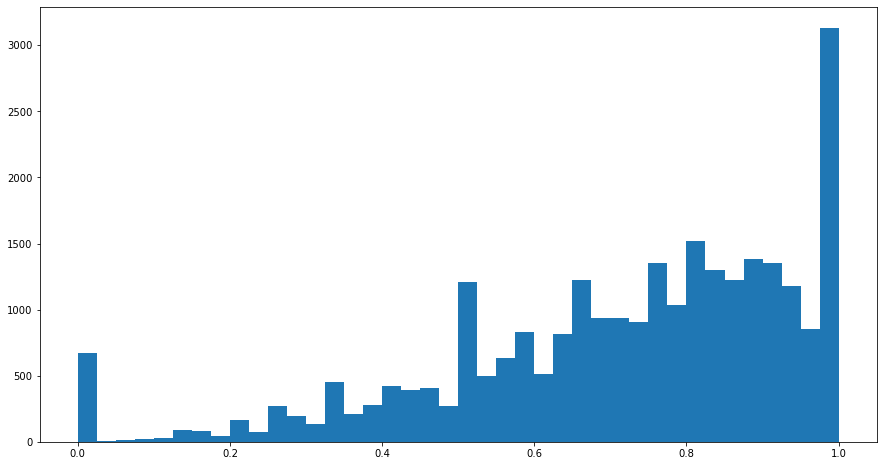

In [42]:
import seaborn
pos_rating, neg_rating = df['positive_ratings'].to_numpy(), df['negative_ratings'].to_numpy()

ratio = pos_rating / (pos_rating + neg_rating)

fig, ax = plt.subplots(figsize=(15,8))
ax.hist(ratio, 40)


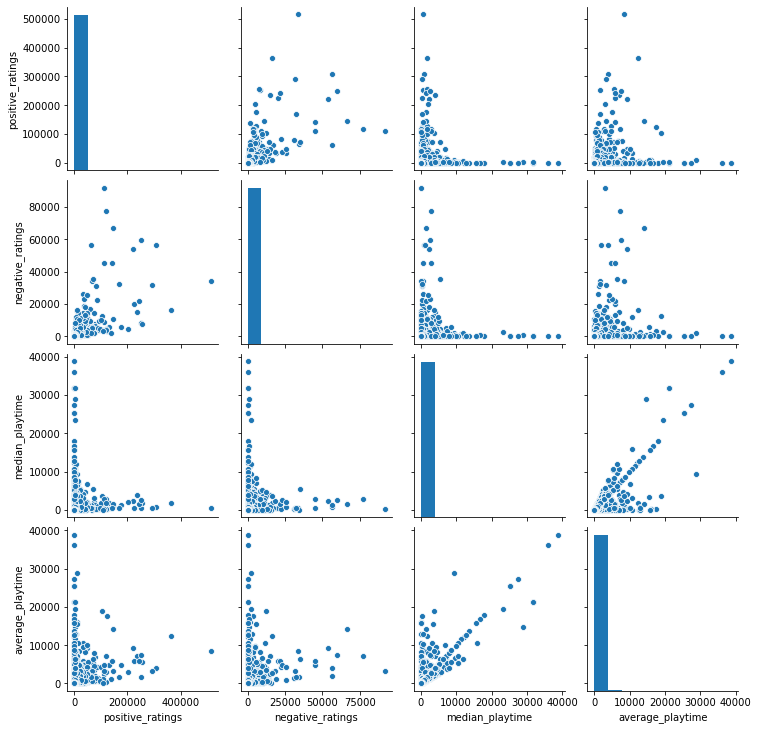

In [43]:
import seaborn as sns
sns.pairplot(df[['positive_ratings','negative_ratings','median_playtime','average_playtime']])